In [1]:
import sys
import os
import pandas as pd
import joblib
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sys.path.append(os.path.abspath("../scripts"))
from feature_extraction import extract_features

In [3]:
# Load model and label encoder
model = joblib.load("../model/threat_model.pkl")
le = joblib.load("../model/threat_label_encoder.pkl")

In [4]:
# Load dataset
df = pd.read_csv("../data/threat_data.csv")  # This is your training data

In [5]:
# Extract features and labels
X = [extract_features(url) for url in df["url"]]
y_true = le.transform(df["label"])   # Encode labels to match y_pred
y_pred = model.predict(X)

In [6]:
# Evaluation
print(classification_report(y_true, y_pred, target_names=le.classes_))

               precision    recall  f1-score   support

       benign       1.00      0.96      0.98        28
sql_injection       0.96      1.00      0.98        23
          xss       1.00      1.00      1.00        32

     accuracy                           0.99        83
    macro avg       0.99      0.99      0.99        83
 weighted avg       0.99      0.99      0.99        83



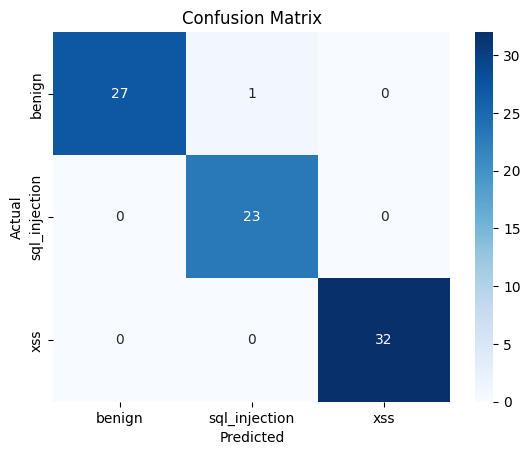

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
